#Machine Learning: Decision Trees
Construction of a random forest to classify phone data into activity phases.  
Using the UCI Machine Learning Dataset

In [7]:
ls

2015-09-09_train_test_split.ipynb  2015-10-04_randomforests.ipynb     UCI HAR Dataset.zip
2015-09-13_overfitting.py.ipynb    README.md                          random_forest.py
2015-09-17_cross_validation.ipynb  UCI HAR Dataset/                   sampleData.csv


In [15]:
ls

README.txt           activity_labels.txt* features.txt*        features_info.txt*   test/                train/


In [21]:
#Load features names:
import pandas as pd
features_df = pd.read_csv('features.txt', sep = " ")

In [111]:
#Get the features:
features_df.head()

,1,tBodyAcc-mean()-X
0,2,tBodyAcc-mean()-Y
1,3,tBodyAcc-mean()-Z
2,4,tBodyAcc-std()-X
3,5,tBodyAcc-std()-Y
4,6,tBodyAcc-std()-Z


In [43]:
X_train = pd.read_csv("train/X_train.txt", sep = " ")

CParserError: Error tokenizing data. C error: Expected 662 fields in line 27, saw 665


In [72]:
#^ THAT COMPLETELY FAILS.
pwd

u'/Users/mdrew/thinkful/machine_learning'

In [163]:
import sklearn.ensemble as sk
import pylab as pl
import sklearn.metrics as skm


xt = []
yt = []
features = []
activity = {1: "walking", 2: "walking_upstairs", 3: "walking_downstairs",
            4: "sitting", 5: "standing", 6: "laying"}
c = []
feat = open('UCI HAR Dataset/features.txt', 'r')
for i, r in enumerate(feat):
    c.append("x" + str(i))
    features.append(r.split()[1])

dex = []
subj = open('UCI HAR Dataset/train/subject_train.txt', 'r')
for line in subj:
    dex.append(int(line))
xtrain = open('UCI HAR Dataset/train/X_train.txt', 'r')
for line in xtrain:
    # df.loc[i] = np.array([line.rstrip().split()])
    xt.append(map(lambda x: float(x), line.split()))

ytrain = open('UCI HAR Dataset/train/y_train.txt', 'r')
for line in ytrain:
    yt.append(activity[int(line.rstrip())])
df = pd.DataFrame(xt, columns=c)
df['p_ID'] = dex
df['activity'] = yt


In [164]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x553,x554,x555,x556,x557,x558,x559,x560,p_ID,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing


In [165]:
training_set = df.loc[df['p_ID'] >= 27]

In [166]:
train_feat = training_set.columns[:-2]

In [167]:
train_feat

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9', 
       ...
       u'x551', u'x552', u'x553', u'x554', u'x555', u'x556', u'x557', u'x558',
       u'x559', u'x560'],
      dtype='object', length=561)

In [168]:
X = training_set[train_feat]

In [169]:
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x551,x552,x553,x554,x555,x556,x557,x558,x559,x560
5867,0.278791,-0.032477,-0.145829,-0.993050,-0.938822,-0.928840,-0.993505,-0.935597,-0.916592,-0.937860,...,0.469190,-0.807955,-0.939560,-0.051193,0.102632,0.066183,0.944358,-0.838642,0.209054,0.005301
5868,0.275709,-0.017983,-0.102424,-0.995569,-0.981350,-0.978256,-0.995906,-0.981642,-0.981780,-0.942066,...,0.270056,-0.586514,-0.844675,0.099949,-0.033375,0.629909,0.409820,-0.830250,0.215456,0.014507
5869,0.277683,-0.021163,-0.107035,-0.995089,-0.982616,-0.985356,-0.996059,-0.983539,-0.985157,-0.934012,...,0.243723,-0.480027,-0.818973,-0.108542,0.221648,0.784523,-0.281809,-0.829194,0.216168,0.013870
5870,0.277301,-0.015994,-0.098619,-0.994266,-0.978326,-0.976918,-0.995092,-0.978368,-0.975008,-0.934012,...,0.294119,-0.480123,-0.753174,0.033209,0.391622,0.878145,-0.952204,-0.827296,0.217438,0.012735
5871,0.279601,-0.013969,-0.090564,-0.995235,-0.987974,-0.989725,-0.995816,-0.988687,-0.989033,-0.940833,...,0.394216,-0.721772,-0.921732,-0.013611,-0.501153,0.860905,-0.182502,-0.827697,0.217023,0.009989


In [170]:
Y= training_set['activity']

In [171]:
Y.head()

5867    standing
5868    standing
5869    standing
5870    standing
5871    standing
Name: activity, dtype: object

In [172]:
#Instantiate the estimator object, using out of bag sampling for score estimation
rf = sk.RandomForestClassifier(n_estimators=50, oob_score=True)

In [173]:
#Fit the RF estimator to X and y DF:
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [174]:
#RF OOB Score:
rf.oob_score_

0.99124579124579126

In [175]:
dir(rf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_estimators',
 'n_features_',
 'n_jobs',
 'n_outputs_',
 'oob_decision_function_',
 'oob_score',
 'oob_score_',
 

In [176]:
test_set = df.loc[df['p_ID'] <= 6]
testX = test_set[train_feat]
testY = test_set['activity']


In [177]:
print "mean accuracy score for the RF model on test data: ", rf.score(
    testX, testY)
print "test (prediction): ", rf.predict(testX)

mean accuracy score for the RF model on test data:  0.828897338403
test (prediction):  ['standing' 'standing' 'standing' ..., 'walking_downstairs'
 'walking_downstairs' 'walking_downstairs']


In [178]:
#Feature Importances:
rf.feature_importances_
#Long list of features with some sort of score

array([  2.87400422e-04,   1.10177243e-04,   2.30896207e-04,
         4.20677997e-03,   3.11452649e-05,   4.08375165e-03,
         3.55447445e-03,   5.20277350e-05,   5.85867104e-04,
         5.52663774e-03,   8.30477986e-05,   7.46833451e-04,
         5.41978038e-05,   4.40127525e-05,   6.74786177e-04,
         4.08040471e-03,   7.50769597e-03,   0.00000000e+00,
         4.14816613e-04,   4.86314053e-03,   2.03558132e-04,
         3.57066168e-04,   2.49939496e-03,   3.47849845e-04,
         0.00000000e+00,   1.12527401e-04,   8.12766612e-06,
         0.00000000e+00,   3.15868568e-05,   1.98884336e-04,
         5.56566193e-05,   3.30609318e-05,   1.27666051e-04,
         5.81487049e-04,   9.53596213e-05,   6.03603854e-05,
         4.08515019e-05,   1.24413570e-02,   1.46794887e-03,
         3.54761095e-03,   1.54174217e-02,   8.93438597e-03,
         2.17813474e-02,   3.36211723e-04,   1.43749083e-03,
         1.52288984e-04,   1.88432206e-03,   2.09019628e-03,
         2.49465485e-04,

In [179]:
len(rf.feature_importances_)

561

In [189]:
for n in range(50):
    z = (n+1)/1000.0 + .010
    important_features = [(features[i], n)
                          for i, n in enumerate(rf.feature_importances_)
                          if n >= z]
    if len(important_features) <= 10:
        print "the top %s features in the random forest model:{0}".format(
            len(important_features))
        print important_features
        break

the top %s features in the random forest model:10
[('tGravityAcc-mean()-X', 0.015417421718403301), ('tGravityAcc-mean()-Z', 0.021781347403762107), ('tGravityAcc-max()-Z', 0.02083637152503116), ('tGravityAcc-min()-X', 0.027407946369494191), ('tGravityAcc-min()-Y', 0.018566765311615458), ('tGravityAcc-min()-Z', 0.022901142329400388), ('tGravityAcc-energy()-X', 0.019870787967246686), ('tGravityAcc-energy()-Z', 0.0420276133924357), ('angle(X,gravityMean)', 0.029515156383825847), ('angle(Y,gravityMean)', 0.021506357297663228)]


In [190]:
#THIS TOTALLY FAILS TOO:

#Attempt top 10 feature extraction using argpartition fn:
import numpy as np
type(rf.feature_importances_)
indices = np.argpartition(rf.feature_importances_,10)[-10:]
top_features = [features[index] for index in indices]
ziplist = zip(rf.feature_importances_, top_features)
temp_list = sorted(ziplist,reverse=True)
ziplist

[(0.00028740042150035111, 'tBodyAcc-iqr()-X'),
 (0.00011017724343520548, 'tBodyAcc-energy()-X'),
 (0.00023089620677668957, 'tBodyAcc-sma()'),
 (0.0042067799728886489, 'tBodyAcc-max()-X'),
 (3.1145264855226164e-05, 'tBodyAcc-mad()-X'),
 (0.0040837516492555452, 'tBodyAcc-std()-Z'),
 (0.0035544744489390966, 'tBodyAcc-std()-X'),
 (5.2027734987009468e-05, 'angle(X,gravityMean)'),
 (0.000585867103855305, 'angle(Y,gravityMean)'),
 (0.0055266377393529183, 'angle(Z,gravityMean)')]

Mean accuracy score for the test set:  0.841064638783
Mean accuracy score for validation set:  0.826639892905


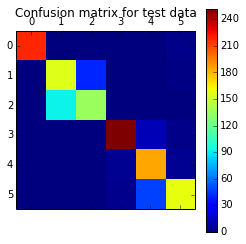

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

validation_set = df.loc[(df["p_ID"] > 21) & (df["p_ID"] < 27)]
validationX = validation_set[train_feat]
validationY = validation_set['activity']
print "Mean accuracy score for the test set: ", rf.score(testX, testY)
print "Mean accuracy score for validation set: ", rf.score(
    validationX, validationY)

test_pred = rf.predict(testX)
test_cm = skm.confusion_matrix(testY, test_pred)

pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()


In [110]:
# Precision score
print "Precision: %f" % (skm.precision_score(testY, test_pred))
# Accuracy score
print "Accuracy: %f" % (skm.accuracy_score(testY, test_pred))
# Recall score
print "Recall: %f" % (skm.recall_score(testY, test_pred))
# F1 score
print "F1: %f" % (skm.f1_score(testY, test_pred))

Precision: 0.853964
Accuracy: 0.841065
Recall: 0.841065
F1: 0.840802


/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
